# Norm and Align LEEM Image Stacks

This tutorial shows how to norm and align LEEM image stacks. You should read "LEEM_plotting" and "LEEM_base" before this one. First, do some imports and load a `LEEMStack`:

In [1]:
import matplotlib.pyplot as plt

from uspy import leem
from uspy.leem import driftnorm

In [2]:
stack = leem.LEEMStack("../testdata/test_stack_IV_g-Cu")

We will look at some images from the stack to compare:

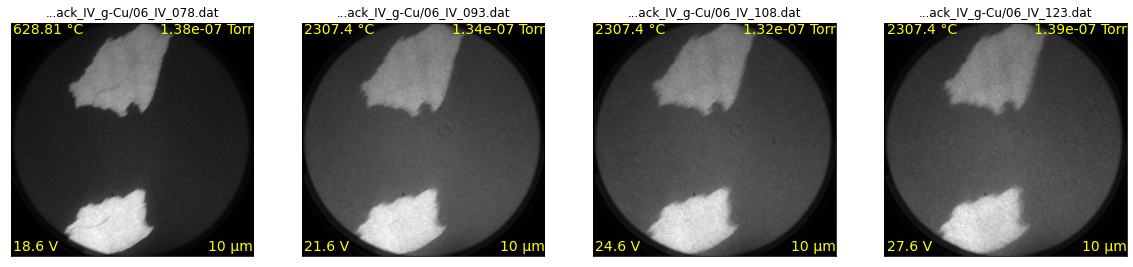

In [3]:
leem.plot_mov(stack, skip=15)

Now, you need to know the location of your channelplate image to normalize the stack. Also, you can subtract dark counts, which are usually around 100. `driftnorm.normalize()` can be used on stacks and also single `LEEMImg` images. After that, look at the result. In this case, it is really dark because of the "burnt spot" that is very bright.

▕▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▏ 100.0 % Normalizing... (0:00:00)


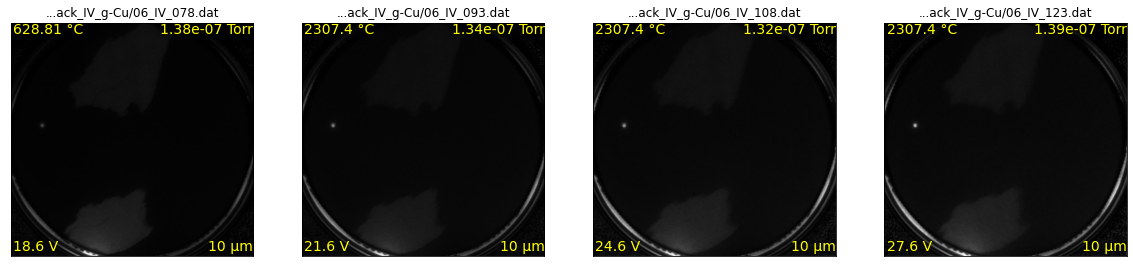

In [4]:
stack = driftnorm.normalize(stack, mcp="../testdata/channelplate.dat")
leem.plot_mov(stack, skip=15)

Now, do drift alignment. For that, you can use SIFT (the default) or ECC. Look at `help(driftnorm.align)` for an explanation of the parameters.

In [5]:
stack, alignment = driftnorm.align(stack, algorithm="ecc", mask_outer=0.2, trafo="translation")

▕▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▏ 100.0 % Calculating drift (ECC) (0:00:02) ETA: 0:00:03)


Look at the plots of the shifts in x and y:

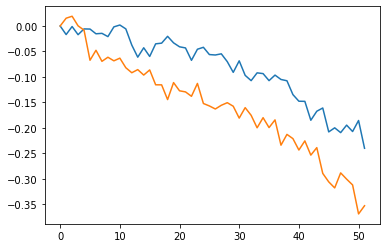

In [9]:
plt.plot([m[0:2, 2] for m in alignment])

And now the result:

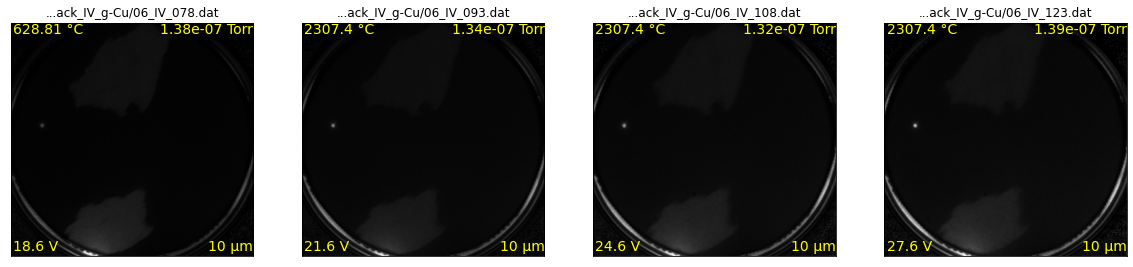

In [10]:
leem.plot_mov(stack, skip=15)

In this case not very spectacular, but it does the job.